In [1]:
# pip install yfinance

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('fivethirtyeight')

In [3]:
end=datetime.now()
start=datetime(end.year-15,end.month,end.day)
stock= 'BTC-USD'
sd=yf.download(stock,start=start,end=end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
sd.head()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100


In [5]:
sd.tail()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2025-04-27,93754.843750,95301.203125,93665.398438,94660.906250,18090367764
2025-04-28,94978.750000,95598.492188,92860.804688,93755.304688,32363449569
2025-04-29,94284.789062,95485.414062,93796.632812,94981.859375,25806129921
2025-04-30,94207.312500,95249.320312,92979.640625,94286.468750,28344679831
2025-05-02,97012.101562,97228.351562,96491.531250,96491.531250,32168169472


In [6]:
sd.describe()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
count,3880.000000,3880.000000,3880.000000,3880.000000,3.880000e+03
mean,21834.783014,22293.787205,21306.078186,21811.663854,1.930983e+10
std,25164.737001,25670.361264,24586.515028,25141.278841,2.081418e+10
min,178.102997,211.731003,171.509995,176.897003,5.914570e+06
25%,1800.465027,1832.972504,1714.360046,1774.407501,7.769392e+08
50%,9700.586914,9908.846680,9507.769043,9699.304199,1.548866e+10
75%,35556.050781,36640.472656,34244.580078,35548.434570,3.055929e+10
max,106146.265625,109114.882812,105291.734375,106147.296875,3.509679e+11


In [7]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3880 entries, 2014-09-17 to 2025-05-02
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   3880 non-null   float64
 1   (High, BTC-USD)    3880 non-null   float64
 2   (Low, BTC-USD)     3880 non-null   float64
 3   (Open, BTC-USD)    3880 non-null   float64
 4   (Volume, BTC-USD)  3880 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 181.9 KB


In [8]:
sd.columns

MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])

In [9]:
#close price data
cp=sd[['Close']]
cp

Price,Close
Ticker,BTC-USD
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2025-04-27,93754.843750
2025-04-28,94978.750000


In [10]:
cp.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2025-04-22', '2025-04-23', '2025-04-24', '2025-04-25',
               '2025-04-26', '2025-04-27', '2025-04-28', '2025-04-29',
               '2025-04-30', '2025-05-02'],
              dtype='datetime64[ns]', name='Date', length=3880, freq=None)

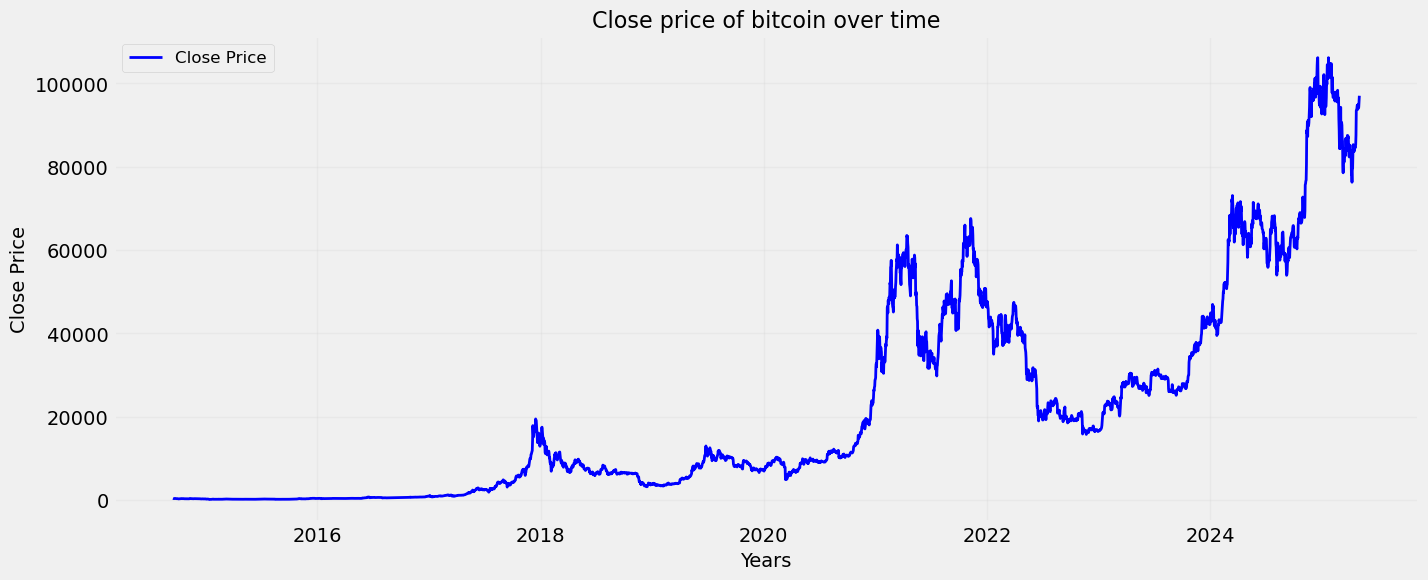

In [11]:
#Plot closing price with enhancement
plt.figure(figsize=(15,6))
plt.plot(cp.index,cp['Close'],label='Close Price',color='blue',linewidth=2)
plt.title("Close price of bitcoin over time",fontsize=16)
plt.xlabel("Years",fontsize=14)
plt.ylabel("Close Price",fontsize=14)
plt.grid(alpha=0.2)
plt.legend(fontsize=12)
plt.show()

In [12]:
# Moving Average
temp_data=[10,20,30,40,50,60,70,80,90,100]
# moving average for 5 day ->null null null null 30.0 40.0
print(sum(temp_data[1:6])/5)

40.0


In [13]:
df1=pd.DataFrame(temp_data)

In [14]:
df1.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0
9,80.0


In [15]:
for i in range(2014,2024):
    print(i,list(sd.index.year).count(i))

2014 106
2015 365
2016 366
2017 365
2018 365
2019 365
2020 366
2021 365
2022 365
2023 365


In [16]:
cp['MA_365']=cp['Close'].rolling(window=365).mean()
cp['MA_100']=cp['Close'].rolling(window=100).mean()

C:\Users\Fanish Sharma\AppData\Local\Temp\ipykernel_16008\3676003445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cp['MA_365']=cp['Close'].rolling(window=365).mean()
C:\Users\Fanish Sharma\AppData\Local\Temp\ipykernel_16008\3676003445.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cp['MA_100']=cp['Close'].rolling(window=100).mean()


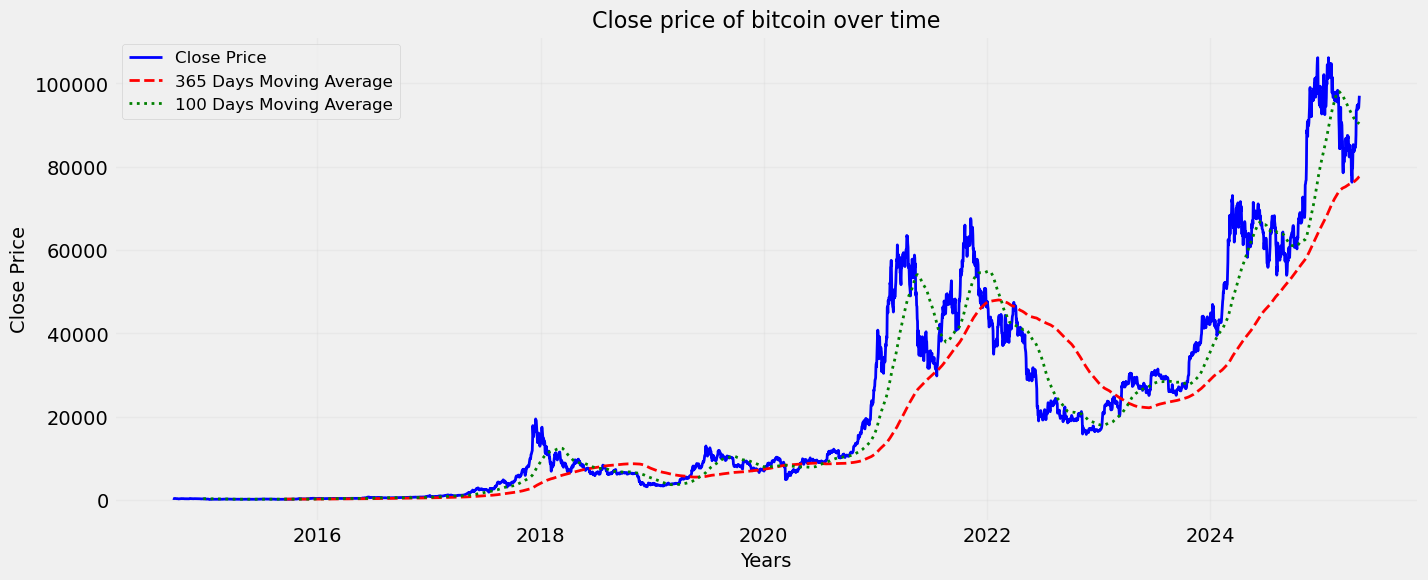

In [17]:
#Plot closing price with enhancement
plt.figure(figsize=(15,6))
plt.plot(cp.index,cp['Close'],label='Close Price',color='blue',linewidth=2)
plt.plot(cp.index,cp['MA_365'],label='365 Days Moving Average',color='red',linestyle='--',linewidth=2)
plt.plot(cp.index,cp['MA_100'],label='100 Days Moving Average',color='green',linestyle=':',linewidth=2)
plt.title("Close price of bitcoin over time",fontsize=16)
plt.xlabel("Years",fontsize=14)
plt.ylabel("Close Price",fontsize=14)
plt.grid(alpha=0.2)
plt.legend(fontsize=12)
plt.show()

In [18]:
# LSTM -> Long short term memory.
# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(cp[['Close']].dropna())

In [19]:
scaled_data

array([[0.00263505],
       [0.00232463],
       [0.00204489],
       ...,
       [0.88806566],
       [0.88733453],
       [0.91380275]])

In [20]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [21]:
# Prepare data for listm
x_data=[]
y_data=[]
base_days=100
for i in range(base_days,len(scaled_data)):
    x_data.append(scaled_data[i-base_days: i])
    y_data.append(scaled_data[i])
x_data=np.array(x_data)
y_data=np.array(y_data)

In [22]:
# Split into train and test sets
train_size=int(len(x_data)*0.9)
x_train,y_train=x_data[:train_size],y_data[:train_size]
x_test,y_test=x_data[train_size:],y_data[train_size:]

In [23]:
model=Sequential([LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1)),
                 LSTM(64,return_sequences=False),
                 Dense(25),
                 Dense(1)
])
model.compile(optimizer="adam",loss="mean_squared_error")
model.summary()

C:\Users\Fanish Sharma\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.fit(x_train,y_train,batch_size=5,epochs=10)

Epoch 1/10
681/681 ━━━━━━━━━━━━━━━━━━━━ 70s 92ms/step - loss: 0.0013
Epoch 2/10
681/681 ━━━━━━━━━━━━━━━━━━━━ 60s 88ms/step - loss: 2.6177e-04
Epoch 3/10
681/681 ━━━━━━━━━━━━━━━━━━━━ 83s 89ms/step - loss: 1.8987e-04
Epoch 4/10
681/681 ━━━━━━━━━━━━━━━━━━━━ 92s 103ms/step - loss: 1.5256e-04
Epoch 5/10
681/681 ━━━━━━━━━━━━━━━━━━━━ 69s 101ms/step - loss: 1.5756e-04
Epoch 6/10
681/681 ━━━━━━━━━━━━━━━━━━━━ 66s 96ms/step - loss: 1.0993e-04
Epoch 7/10
681/681 ━━━━━━━━━━━━━━━━━━━━ 63s 93ms/step - loss: 1.7233e-04
Epoch 8/10
681/681 ━━━━━━━━━━━━━━━━━━━━ 65s 96ms/step - loss: 1.3602e-04
Epoch 9/10
681/681 ━━━━━━━━━━━━━━━━━━━━ 64s 94ms/step - loss: 1.1063e-04
Epoch 10/10
681/681 ━━━━━━━━━━━━━━━━━━━━ 67s 98ms/step - loss: 1.3815e-04


In [25]:
predictions=model.predict(x_test)
inv_predictions=scaler.inverse_transform(predictions)
inv_y_test=scaler.inverse_transform(y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step


In [26]:
plotting_data=pd.DataFrame(
    {
        'Original': inv_y_test.flatten(),
        'Prediction': inv_predictions.flatten()
    },
    index=cp.index[train_size+base_days:]
)

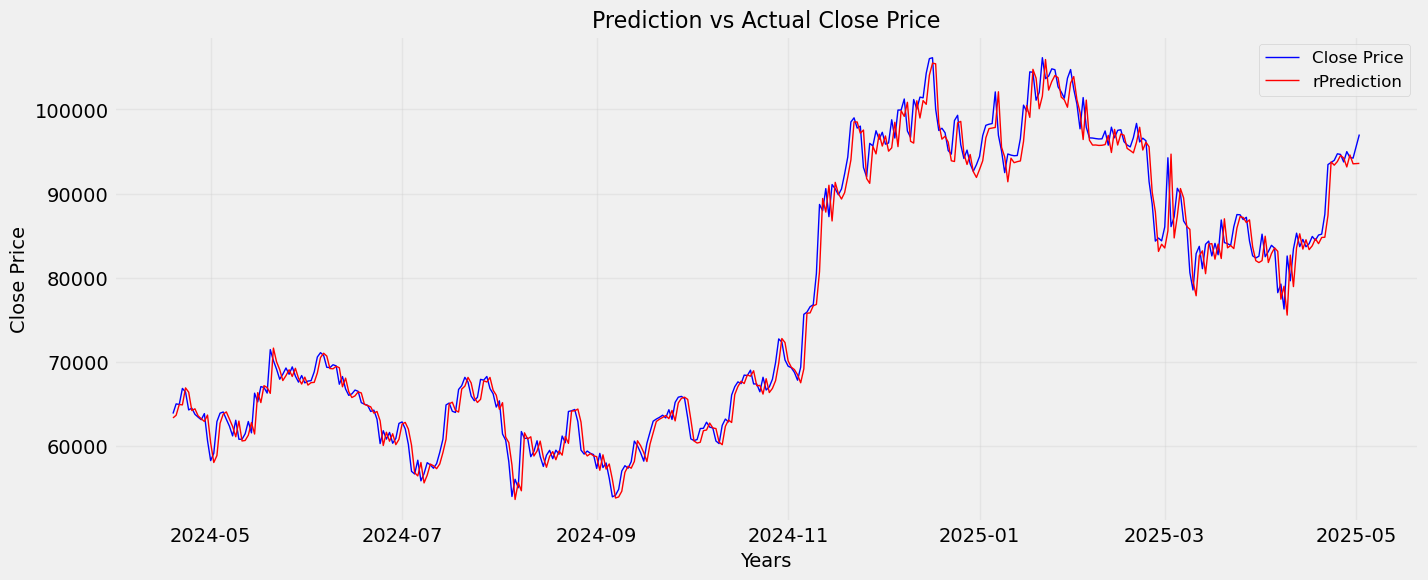

In [27]:
plt.figure(figsize=(15,6))
plt.plot(plotting_data.index,plotting_data['Original'],label='Close Price',color='blue',linewidth=1)
plt.plot(plotting_data.index,plotting_data['Prediction'],label='Prediction',color='red',linewidth=1)

plt.title("Prediction vs Actual Close Price",fontsize=16)
plt.xlabel("Years",fontsize=14)
plt.ylabel("Close Price",fontsize=14)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()

In [28]:
# Predict future days
last_100 = scaled_data[-100:].reshape(1,-1,1)
future_predictions=[]

for _ in range(10):
    next_days=model.predict(last_100)
    future_predictions.append(scaler.inverse_transform(next_days))
    last_100=np.append(last_100[:,1:,:],next_days.reshape(1,1,-1),axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


In [29]:
last_100

array([[[0.9481886 ],
        [0.92019028],
        [0.95526162],
        [0.92191574],
        [0.91005959],
        [0.90985058],
        [0.90924463],
        [0.90880457],
        [0.90897104],
        [0.91781767],
        [0.9018683 ],
        [0.92204823],
        [0.91013906],
        [0.91849159],
        [0.91916521],
        [0.90590349],
        [0.90211321],
        [0.89990655],
        [0.91024987],
        [0.92627665],
        [0.90543652],
        [0.90970394],
        [0.9068367 ],
        [0.86101397],
        [0.83570449],
        [0.79428498],
        [0.79765584],
        [0.79453019],
        [0.81018495],
        [0.8877218 ],
        [0.81050352],
        [0.8214174 ],
        [0.85351541],
        [0.8472698 ],
        [0.81689223],
        [0.81134266],
        [0.75893489],
        [0.73940979],
        [0.78027311],
        [0.78839016],
        [0.76332927],
        [0.79071861],
        [0.79424805],
        [0.77760699],
        [0.79172444],
        [0

In [30]:
future_predictions

[array([[96723.164]], dtype=float32),
 array([[95977.73]], dtype=float32),
 array([[95308.93]], dtype=float32),
 array([[94614.65]], dtype=float32),
 array([[93874.71]], dtype=float32),
 array([[93102.83]], dtype=float32),
 array([[92317.42]], dtype=float32),
 array([[91534.65]], dtype=float32),
 array([[90766.73]], dtype=float32),
 array([[90022.055]], dtype=float32)]

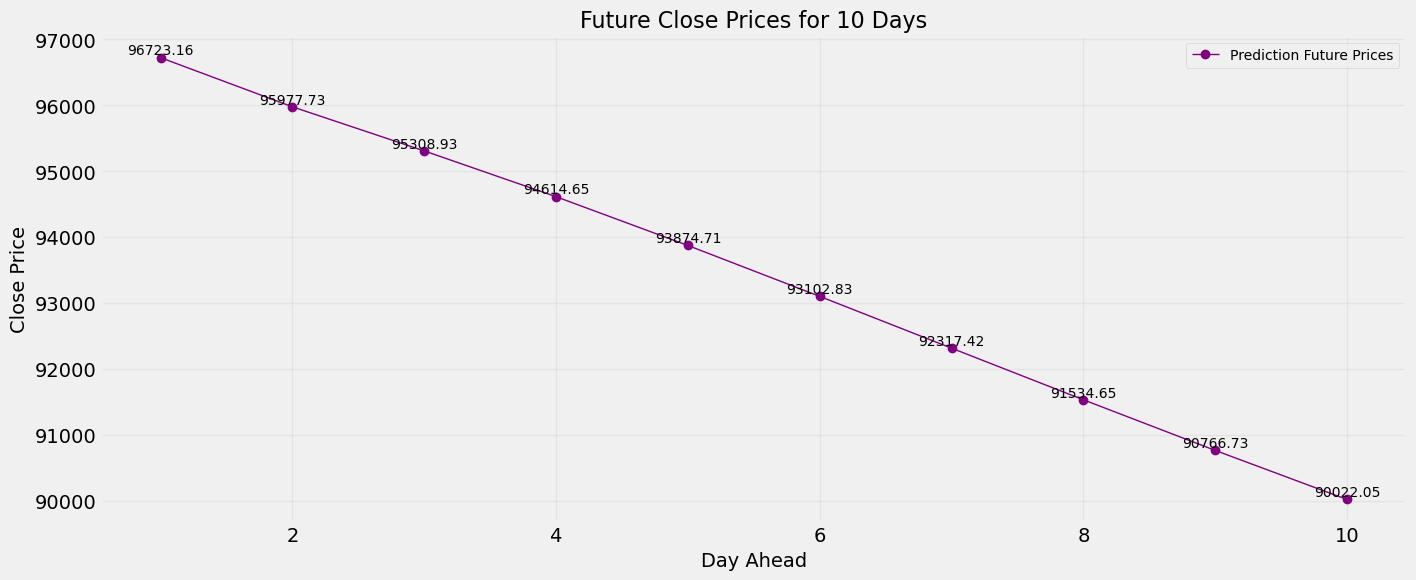

In [31]:
future_predictions=np.array(future_predictions).flatten()

plt.figure(figsize=(15,6))
plt.plot(range(1,11),future_predictions,marker="o",label="Prediction Future Prices",color='purple',linewidth=1)
for i,val in enumerate(future_predictions):
    plt.text(i+1,val,f'{val:.2f}',fontsize=10,ha='center',va='bottom',color='black')

plt.title(F"Future Close Prices for 10 Days",fontsize=16)
plt.xlabel("Day Ahead",fontsize=14)
plt.ylabel("Close Price", fontsize=14)
plt.grid(alpha=0.3)
plt.legend(fontsize=10)
plt.show()

In [32]:
model.save("model.keras")